In [140]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

In [145]:
video_capture = cv2.VideoCapture(0)

# Check success
if not video_capture.isOpened():
    raise Exception("Could not open video device")

# Read picture. ret === True on success
ret, frame = video_capture.read()

# Close device
video_capture.release()

# Image Management
# plt.imshow(frame)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)

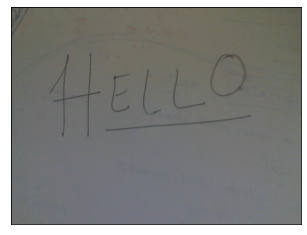

In [146]:
plt.xticks([])
plt.yticks([])
plt.imshow(im_pil);

In [147]:
def binarize(image_to_transform, threshold):

    # now, lets convert that image to a single greyscale image using convert()

    output_image=image_to_transform.convert("L")

    # the threshold value is usually provided as a number between 0 and 255, which

    # is the number of bits in a byte.

    # the algorithm for the binarization is pretty simple, go through every pixel in the

    # image and, if it's greater than the threshold, turn it all the way up (255), and

    # if it's lower than the threshold, turn it all the way down (0).

    # so lets write this in code. First, we need to iterate over all of the pixels in the

    # image we want to work with

    for x in range(output_image.width):

        for y in range(output_image.height):

            # for the given pixel at w,h, lets check its value against the threshold

            if output_image.getpixel((x,y))< threshold: #note that the first parameter is actually a tuple object

                # lets set this to zero

                output_image.putpixel( (x,y), 0 )

            else:

                # otherwise lets set this to 255

                output_image.putpixel( (x,y), 255 )

    #now we just return the new image

    return output_image

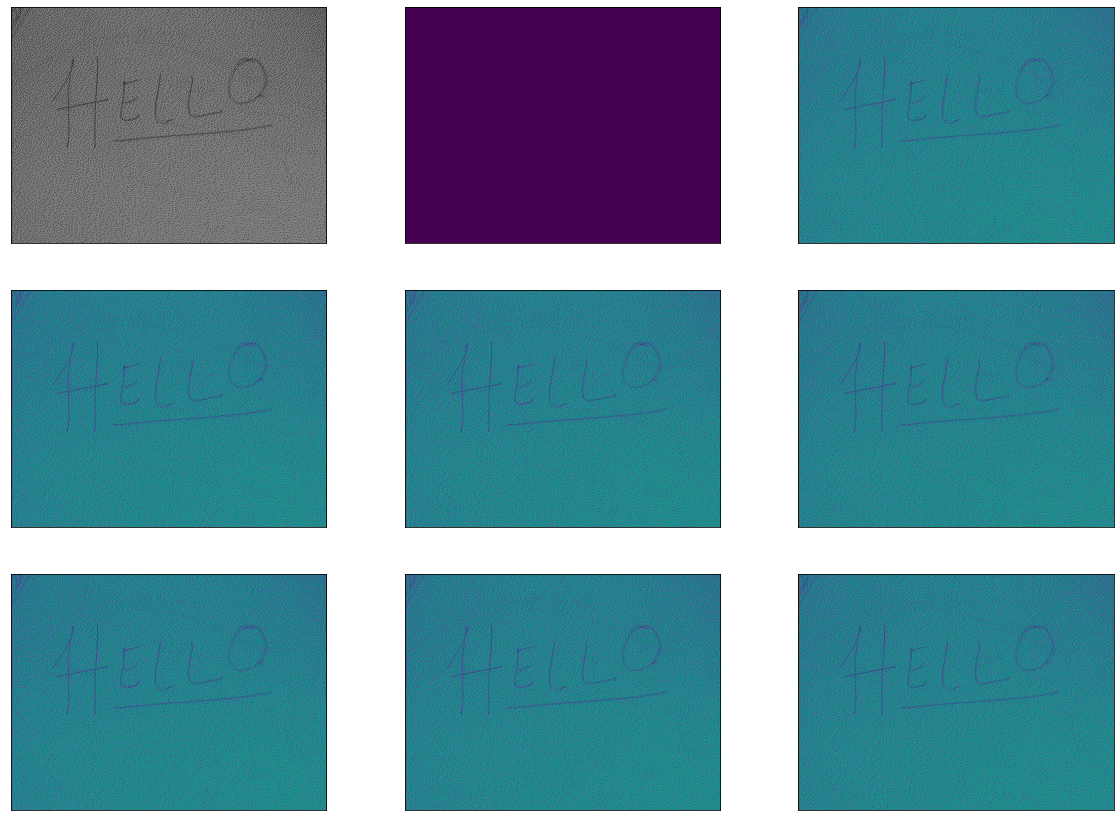

<Figure size 432x288 with 0 Axes>

In [148]:
plt.figure(figsize = [20, 20])

plt.subplot(4,3,1)
plt.imshow(im_pil.convert('1'))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,2)
plt.imshow(binarize(im_pil.convert('1'), 0))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,3)
plt.imshow(binarize(im_pil.convert('1'), 10))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,4)
plt.imshow(binarize(im_pil.convert('1'), 20))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,5)
plt.imshow(binarize(im_pil.convert('1'), 50))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,6)
plt.imshow(binarize(im_pil.convert('1'), 100))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,7)
plt.imshow(binarize(im_pil.convert('1'), 150))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,8)
plt.imshow(binarize(im_pil.convert('1'), 200))
plt.xticks([])
plt.yticks([])

plt.subplot(4,3,9)
plt.imshow(binarize(im_pil.convert('1'), 255))
plt.xticks([])
plt.yticks([])

img = plt.show()
plt.savefig('Collage.jpg');

In [149]:
img_shape = np.array(im_pil.convert('1')).shape
collage_img = np.zeros(np.array(img_shape) * 3)

In [152]:
collage_img[0 * img_shape[0] : 1 * img_shape[0], 0 * img_shape[1] : 1 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 70)) * 1
collage_img[0 * img_shape[0] : 1 * img_shape[0], 1 * img_shape[1] : 2 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 75)) * 1
collage_img[0 * img_shape[0] : 1 * img_shape[0], 2 * img_shape[1] : 3 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 80)) * 1
collage_img[1 * img_shape[0] : 2 * img_shape[0], 0 * img_shape[1] : 1 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 85)) * 1
collage_img[1 * img_shape[0] : 2 * img_shape[0], 1 * img_shape[1] : 2 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 90)) * 1
collage_img[1 * img_shape[0] : 2 * img_shape[0], 2 * img_shape[1] : 3 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 95)) * 1
collage_img[2 * img_shape[0] : 3 * img_shape[0], 0 * img_shape[1] : 1 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 100)) * 1
collage_img[2 * img_shape[0] : 3 * img_shape[0], 1 * img_shape[1] : 2 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 105)) * 1
collage_img[2 * img_shape[0] : 3 * img_shape[0], 2 * img_shape[1] : 3 * img_shape[1]] = np.array(binarize(im_pil.convert('L'), 100)) * 1

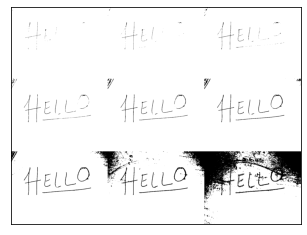

In [153]:
plt.xticks([])
plt.yticks([])
plt.imshow(collage_img, cmap = 'gray');

In [156]:
text = tess.image_to_string(collage_img)
print(text)